In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/labeled_data.csv")
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [3]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [4]:
df.duplicated().any()

False

In [5]:
import re

def remove_urls(text):
    return re.sub(r"http\S+", "", text)

def remove_mentions(text):
    return re.sub(r"@\w+", "", text)

df["tweet"] = df["tweet"].apply(remove_urls)
df["tweet"] = df["tweet"].apply(remove_mentions)
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT : As a woman you shouldn't complain abo...
1,1,3,0,3,0,1,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,2,3,0,3,0,1,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitc...
3,3,3,0,2,1,1,!!!!!!!!! RT : she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT : The shit you hear about me ...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;: right! His ...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [6]:
df["tweet"] = df["tweet"].apply(lambda x: x.lower())
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! rt : as a woman you shouldn't complain abo...
1,1,3,0,3,0,1,!!!!! rt : boy dats cold...tyga dwn bad for cu...
2,2,3,0,3,0,1,!!!!!!! rt dawg!!!! rt : you ever fuck a bitc...
3,3,3,0,2,1,1,!!!!!!!!! rt : she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! rt : the shit you hear about me ...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;: right! his ...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like i ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [7]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def remove_stop_words(text):
    return " ".join([word for word in text.split() if word not in stop_words])

df["tweet"] = df["tweet"].apply(remove_stop_words)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! rt : woman complain cleaning house. &amp; ...
1,1,3,0,3,0,1,!!!!! rt : boy dats cold...tyga dwn bad cuffin...
2,2,3,0,3,0,1,!!!!!!! rt dawg!!!! rt : ever fuck bitch start...
3,3,3,0,2,1,1,!!!!!!!!! rt : look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! rt : shit hear might true might ...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's muthaf***in lie &#8220;: right! tl trash...
24779,25292,3,0,1,2,2,"gone broke wrong heart baby, drove redneck crazy"
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like aint ...
24781,25295,6,0,6,0,1,youu got wild bitches tellin lies


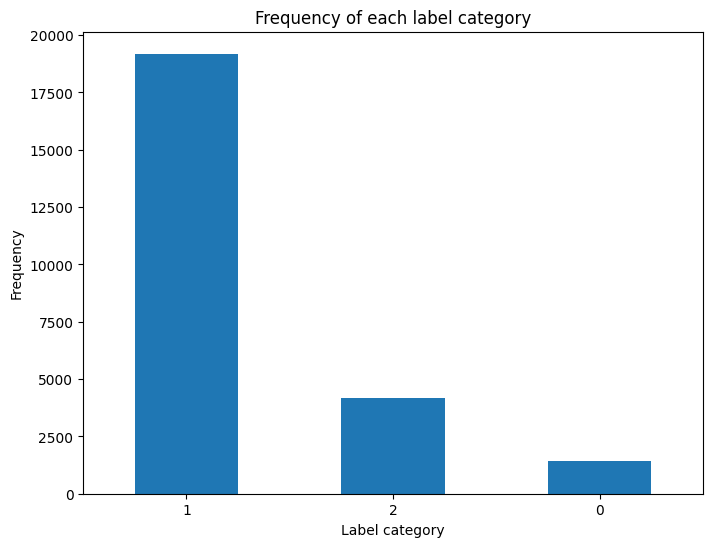

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
df['class'].value_counts().plot(kind='bar', rot=0)
plt.title('Frequency of each label category')
plt.xlabel('Label category')
plt.ylabel('Frequency')
plt.show()

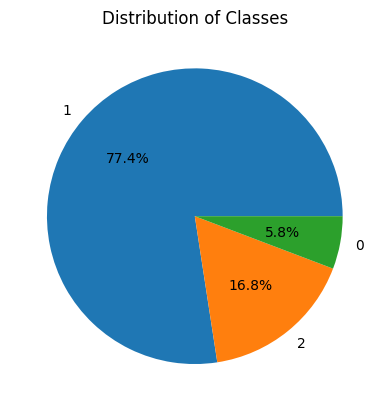

In [ ]:
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Classes')
plt.show()

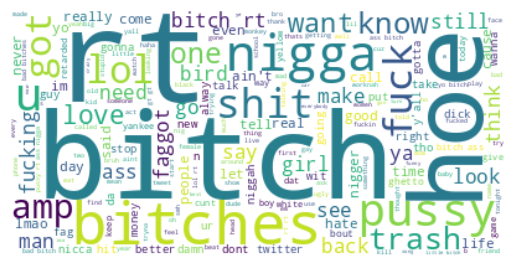

In [11]:

from wordcloud import WordCloud
text = " ".join(review for review in df['tweet'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

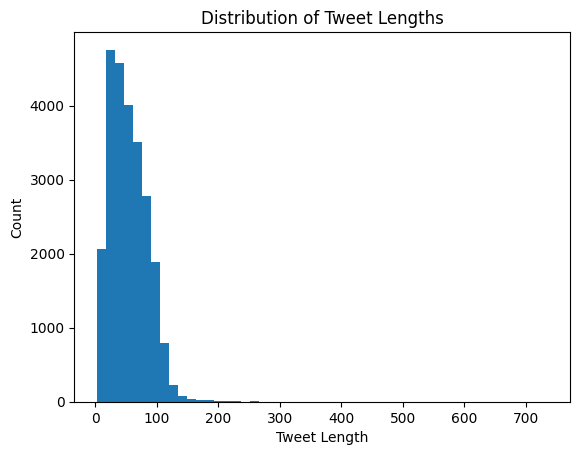

In [ ]:
tweet_lengths = df['tweet'].apply(len)
plt.hist(tweet_lengths, bins=50)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['tweet'])
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the classifier on the test set

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

# Use the classifier to predict the presence of fight abuse in a new tweet
test_tweet = ['you know what they say, the early bird gets the worm','I always wanted to kill that guy']
for x in test_tweet:
  new_tweet = ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words])
  new_tweet_vec = vectorizer.transform([new_tweet])
  prediction = clf.predict(new_tweet_vec)[0]
  if prediction == 1:
      print('This tweet'+"'"+x+"'"+ 'contains fight abuse.')
  else:
      print('This tweet'+"'"+x+"'"+ ' does not contain fight abuse.')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.8618695359784802
Precision: 0.8342868831540666
Recall: 0.8618695359784802
F1-Score: 0.8395997397480489
This tweet'you know what they say, the early bird gets the worm' does not contain fight abuse.
This tweet'I always wanted to kill that guy'contains fight abuse.
